In [1]:
import torch
import math 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def f(x):
    return 3*x**2- 4*x +5

In [3]:
f(3)

20

In [4]:
xs = np.arange(-5,5,0.25)

In [5]:
ys = f(xs)

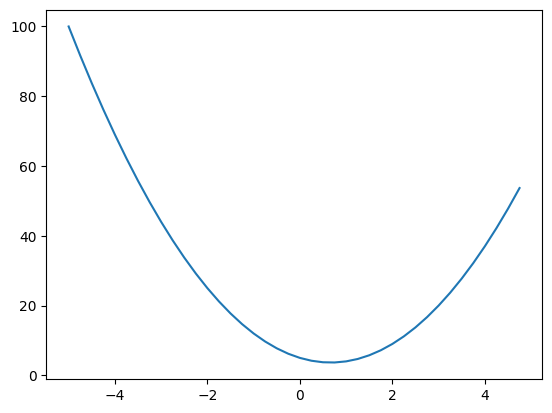

In [6]:
plt.plot(xs,ys)

In [7]:
h = 0.000000001
x=2/3
dx = (f(x+h)-f(x))/h
dx

0.0

In [8]:
a= 2.0
b= -3.0
c= 10.0

d = a*b +c
print(d)

4.0


In [9]:
h = 0.0001

# inputs 

a= 2.0
b= -3.0
c= 10.0
d1 = a*b +c
c+= h
d2= a*b +c
print('d1' , d1)
print('d2' , d2)
print('slope' ,(d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [47]:
class Value:
    def __init__(self,data, _children =() , _op ='', label =''):
        self.data = data 
        self.grad =0.0 
        self._prev = set(_children)
        self._backward = lambda:None
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __rmul__(slef, other):
        return self*other

    def __truediv__(self,other):
        return self*other**-1

    def __add__(self,other):
        other = other if isinstance(other , Value) else Value(other)
        out = Value(self.data + other.data , (self, other) , '+')
        def _backward():
            self.grad +=1.0*out.grad
            other.grad +=1.0*out.grad
        out._backward = _backward
        return out


    def __neg__(self):
        return self * -1

    def __sub__(self,other):
        return self+ (-other)
    def __mul__(self,other):
        other = other if isinstance(other , Value) else Value(other)
        out = Value(self.data * other.data , (self,other) , '*')
        def _backward():
            self.grad +=(other.data)*out.grad
            other.grad +=(self.data)*out.grad
        out._backward = _backward
        return out

    def __pow__(self,other):
        assert isinstance(other , (int , float)) ,"only supporting in t/float powers for now"
        out = Value(self.data**other , (self,), f'**{other}')

        def _backward():
            self.grad += other  * self.data **(other -1) * out.grad
        out._backward = _backward

        return out

    def tanh(self):
        n=self.data
        t= ((math.exp(2*n)-1)/(math.exp(2*n)+1))
        out= Value(t , (self,) , 'tanh')
        def _backward():
            self.grad +=(1 - t**2)*out.grad
        out._backward = _backward
        return out


    def exp(self):
        x = slef.data
        out = Value(math.exp(x) , (self,) , 'exp')


        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward


    def backward(self):
        topo=[]
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad= 1.0
        for node in reversed(topo):
            node._backward()


a = Value(2.0 , label = 'a')
b = Value(-3.0 ,label = 'b')
c= Value(10.0, label = 'c')

# d = a * b +c
# a.alph()

e = a*b; e.label ='e'
d=e+c;d.label ='d'

f= Value(-2.0 , label ='f')
L = d*f; L.label ='L'
L

Value(data=-8.0)

In [11]:
a =Value(2.0)
a =Value(4.0)
a-b

Value(data=7.0)

In [12]:
L.grad =1.0
f.grad = 4.0
d.grad = -2.0

In [13]:
def lol():
    h=0.0001

    a = Value(2.0 , label = 'a')
    b = Value(-3.0 ,label = 'b')
    c= Value(10.0, label = 'c')
    e = a*b; e.label ='e'
    d=e+c;d.labl ='d'
    f= Value(-2.0 , label ='f')
    L = d*f; L.label ='L'
    L1 = L.data
    
    
    a = Value(2.0 + h , label = 'a')
    b = Value(-3.0 ,label = 'b')
    c= Value(10.0, label = 'c')
    e = a*b; e.label ='e'
    d=e+c;d.labl ='d'
    f= Value(-2.0 , label ='f')
    L = d*f; L.label ='L'
    L2 = L.data

    print((L2-L1)/h)

lol()

6.000000000021544


In [14]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %.4f}" % (n.label , n.data  , n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

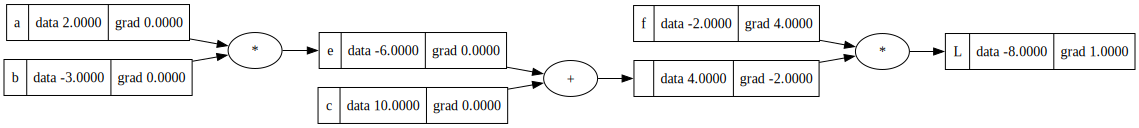

In [15]:
draw_dot(L)

In [16]:
c.grad = - 2.0
e.grad = -2.0

In [17]:
a.grad =  6.0
b.grad = -4.0

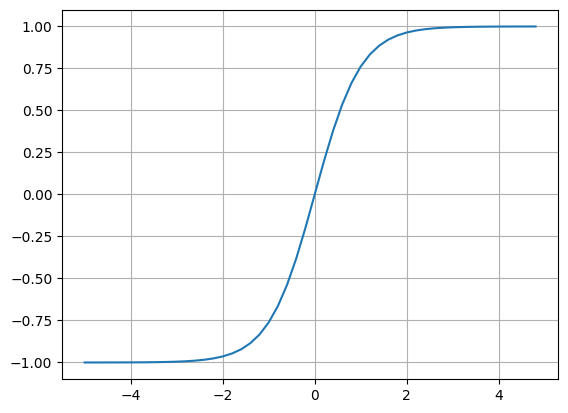

In [38]:
plt.plot(np.arange(-5,5,0.2) , np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [19]:
x1 = Value(2.0 , label ='x1')
x2 = Value(0.0 , label ='x2')

#weights
w1 = Value(-3.0 , label ='w1')
w2 = Value(1.0, label ='w2')
# bias
b= Value(6.8813735870195432 , label ='b')

#x1w1 +x2w2 +b
x1w1 = x1*w1;x1w1.label = 'x1*w1'
x2w2 = x2*w2;x2w2.label = 'x2*w2'
x1w1x2w2 =x1w1+x2w2;x1w1x2w2.label ='x1*w1 +x2*w2'
n=x1w1x2w2 +b ;n.label ='n'
o=n.tanh()


In [20]:
o.grad=1.0
o._backward()

In [21]:
n._backward()

In [22]:
x1w1x2w2._backward()

In [23]:
x1w1._backward()

In [24]:
x2w2._backward()

In [25]:
# o.grad= 1.0

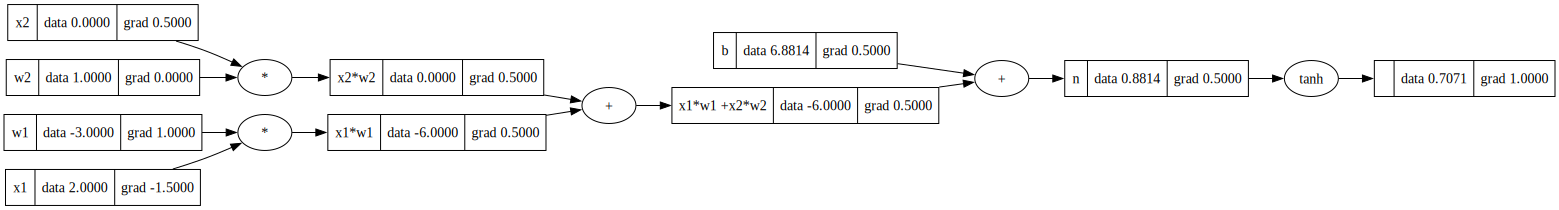

In [26]:
draw_dot(o)

In [27]:
topo=[]
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [28]:
# o is tanh(n)
# derivative is : 1-tanh(x)**2
n.grad = 1-o.data**2

In [39]:
x1 = Value(2.0 , label ='x1')
x2 = Value(0.0 , label ='x2')

#weights
w1 = Value(-3.0 , label ='w1')
w2 = Value(1.0, label ='w2')
# bias
b= Value(6.8813735870195432 , label ='b')

#x1w1 +x2w2 +b
x1w1 = x1*w1;x1w1.label = 'x1*w1'
x2w2 = x2*w2;x2w2.label = 'x2*w2'
x1w1x2w2 =x1w1+x2w2;x1w1x2w2.label ='x1*w1 +x2*w2'
n=x1w1x2w2 +b ;n.label ='n'
o=n.tanh() ; o.label = 'o'
o.backward()

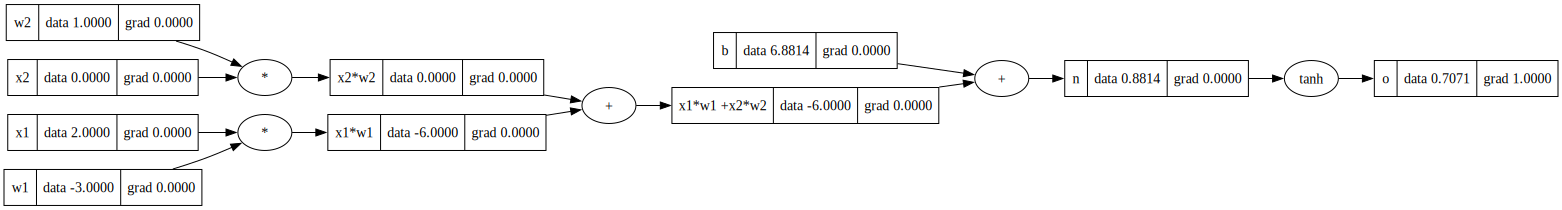

In [40]:
draw_dot(o)

In [31]:
x1w1x2w2.grad =0.5
b.grad=0.5

In [32]:
x1w1.grad = 0.5
x2w2.grad=0.5

In [33]:
x1.grad=-3.0 * 0.5
x2.grad =1.0 * 0.5
w1.grad = 0.5*2.0

w2.grad = 0.5*0.0

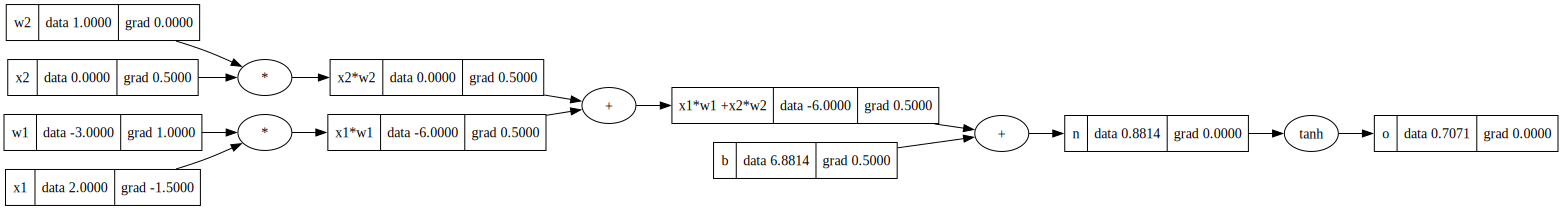

In [34]:
draw_dot(o)

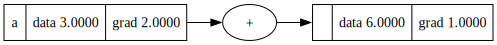

In [35]:
a = Value(3.0 , label='a')
b= a+a ;label ='b'

b.grad=1.0
b._backward()
draw_dot(b) # this is the issue , cause a.grad = 2 as we can see from the expression

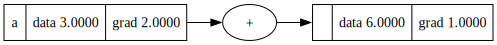

In [36]:
a = Value(3.0 , label='a')
b= a+a ;label ='b'

b.grad=1.0
b._backward()
draw_dot(b) # we used += in the Value class , in def _backward(): function 

In [48]:
x1 = Value(2.0 , label ='x1')
x2 = Value(0.0 , label ='x2')

#weights
w1 = Value(-3.0 , label ='w1')
w2 = Value(1.0, label ='w2')
# bias
b= Value(6.8813735870195432 , label ='b')

#x1w1 +x2w2 +b
x1w1 = x1*w1;x1w1.label = 'x1*w1'
x2w2 = x2*w2;x2w2.label = 'x2*w2'
x1w1x2w2 =x1w1+x2w2;x1w1x2w2.label ='x1*w1 +x2*w2'
n=x1w1x2w2 +b ;n.label ='n'
o=n.tanh() ; o.label = 'o'
o.backward()

In [49]:
for v in [x1, x2, w1, w2, b, n, o]:
    print(v.label, v.grad)


x1 -1.4999999999999996
x2 0.4999999999999999
w1 0.9999999999999998
w2 0.0
b 0.4999999999999999
n 0.4999999999999999
o 1.0


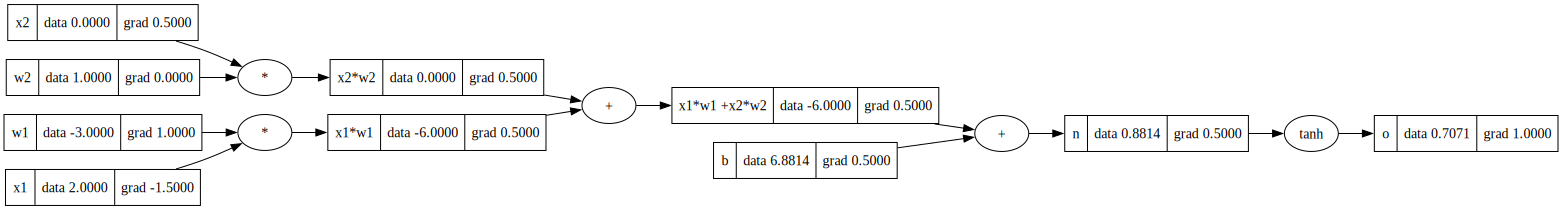

In [50]:
draw_dot(o)

In [58]:
import torch 

x1 = torch.tensor([2.0]).double()         ; x1.requires_grad = True
x2 = torch.tensor([0.0]).double()         ; x2.requires_grad = True
w1 = torch.tensor([-3.0]).double()         ; w1.requires_grad = True
w2 = torch.tensor([1.0]).double()         ; w2.requires_grad = True
b = torch.tensor([6.8813735870195432]).double()         ; b.requires_grad = True
n = x1*w1 + x2*w2 + b      
o=torch.tanh(n)


print(o.data.item())
o.backward()

print('x2' , x2.grad.item())
print('w2' , w2.grad.item())
print('x1' , x1.grad.item())
print('w1' , w1.grad.item())

0.7071066904050358
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [59]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [61]:
o.item()

0.7071066904050358

In [65]:
class Neuron:
  
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
        x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]
        

In [66]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.768070411017293)

In [64]:
import random

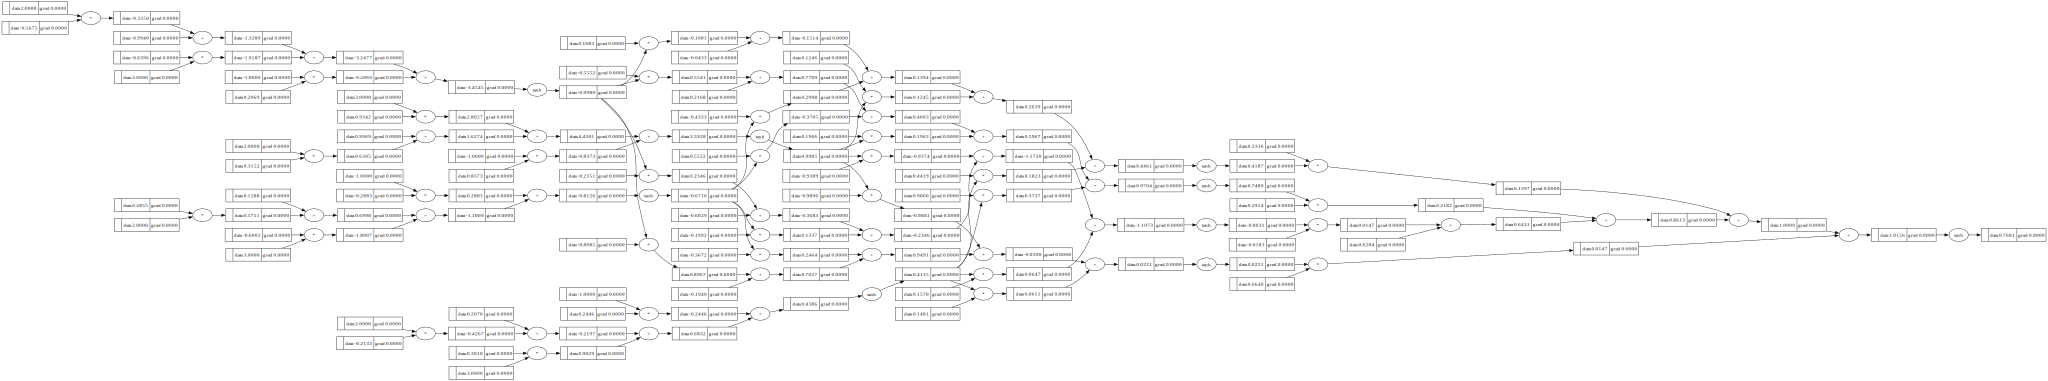

In [67]:
draw_dot(n(x))